___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [3]:
df = pd.read_csv("../DATA/Frozen_Dessert_Production.csv")

In [5]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [ ]:
#convert the dates to date time object using pandas

In [7]:
#set the parse_dates = True to automatically convert the dates to datetime objects in the Dataframe or use to_datatime method
df = pd.read_csv("../DATA/Frozen_Dessert_Production.csv",index_col='DATE',parse_dates=True)

In [8]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [9]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [16]:
df.columns = ['production']

In [17]:
df

,production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

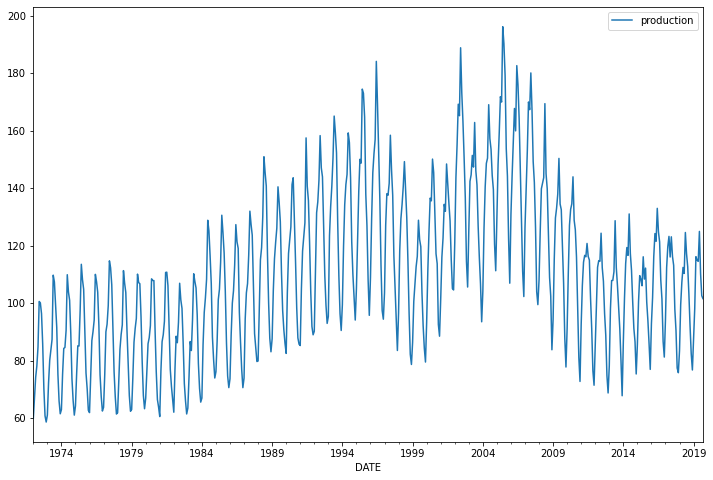

In [19]:
df.plot(figsize=(12,8))

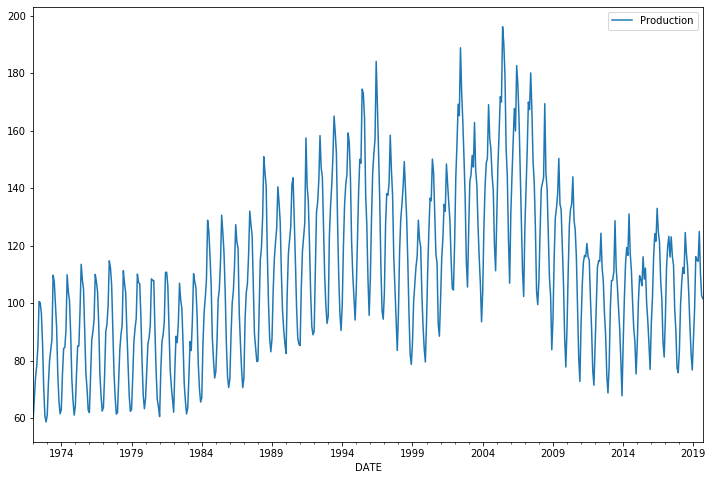

## Train Test Split

**TASK: Figure out the length of the data set**

In [20]:
#no of months
len(df)

573

In [21]:
#years
len(df)/12

47.75

47

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [29]:
train = df.iloc[:549]
test = df.iloc[549:]

In [30]:
len(train)

549

In [31]:
len(test)

24

In [36]:
test

,production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [40]:
scaled_train

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [42]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [64]:
length = 18
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [65]:
generator.targets

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
model = Sequential()

In [74]:
#i/p layer with input shape=(length(generator),nos_features)
model.add(LSTM(100,input_shape=(length,1),activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [66]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [67]:
validation_generator.targets

array([[0.23134679],
       [0.13655347],
       [0.12472921],
       [0.18015997],
       [0.29691617],
       [0.35382169],
       [0.39102302],
       [0.37592272],
       [0.47940099],
       [0.42586022],
       [0.3928192 ],
       [0.32470899],
       [0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

**TASK: Create an EarlyStopping callback based on val_loss.**

In [76]:
#its better to have more patience while training and rnn
early_stop = EarlyStopping(monitor='val_loss',patience=5)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [ ]:
model.fit_generator(generator,validation_data=validation_generator,epochs=15,callbacks=[early_stop])

Epoch 1/15
531/531 [==============================] - 22s 41ms/step - loss: 0.0291 - val_loss: 0.0050
Epoch 2/15
531/531 [==============================] - 21s 40ms/step - loss: 0.0127 - val_loss: 0.0038
Epoch 3/15
531/531 [==============================] - 22s 42ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 4/15
531/531 [==============================] - 21s 39ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 5/15
531/531 [==============================] - 23s 44ms/step - loss: 0.0035 - val_loss: 0.0049
Epoch 6/15
531/531 [==============================] - 23s 44ms/step - loss: 0.0033 - val_loss: 0.0065
Epoch 7/15
531/531 [==============================] - 22s 41ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/15
531/531 [==============================] - 21s 40ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 9/15
531/531 [==============================] - 21s 39ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 10/15
531/531 [==============================] - 23s 43ms/step - loss: 0.002

Epoch 1/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0261 - val_loss: 0.0043
Epoch 2/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 3/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 4/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 6/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 7/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0030 - val_loss: 0.0025


**TASK: Plot the history of the loss that occured during training.**

In [78]:
model.history.history

{'loss': [0.029050661736433933,
  0.012690866944603576,
  0.004114116954504341,
  0.0037465113427187025,
  0.003537498993524146,
  0.003262946578593999,
  0.003279086376670751,
  0.0031385994577745584,
  0.002751328455369621,
  0.002633110099386274,
  0.002672279337170839],
 'val_loss': [0.004953671278599359,
  0.00376179436473952,
  0.004194760408912164,
  0.003165392333661051,
  0.004855867170836821,
  0.006457053177048995,
  0.0032409554117596904,
  0.002426687189048001,
  0.0031435365575210503,
  0.00459109213896151,
  0.003357107370296338]}

In [79]:
df2 = pd.DataFrame(model.history.history)

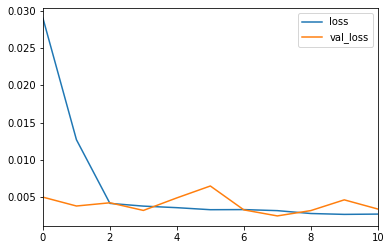

In [80]:
df2.plot()

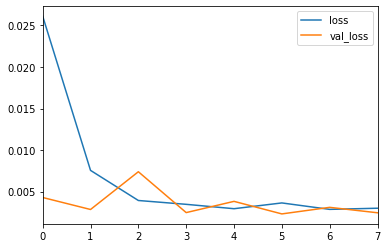

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [112]:
test_predictions = []
first_batch = scaled_train[-length:]
current_batch = first_batch.reshape(1,length,1)

In [113]:
current_batch

array([[[0.4766849 ],
        [0.45728977],
        [0.54050318],
        [0.48134479],
        [0.45575247],
        [0.35906261],
        [0.31068714],
        [0.20365141],
        [0.16432593],
        [0.2587782 ],
        [0.39071032],
        [0.44387077],
        [0.4695409 ],
        [0.41743926],
        [0.46851409],
        [0.41889656],
        [0.39641011],
        [0.28544533]]])

In [99]:
model.predict(current_batch)
#predicted the first point of the test batch by taking the last 18 values in the training set as i/p

array([[0.21306612]], dtype=float32)

In [100]:
scaled_test[0]

array([0.23134679])

In [114]:
for i in range(len(test)):
    pred = model.predict(current_batch)[0]
    test_predictions.append(pred)
    current_batch = np.append(current_batch[:,1:,:],[[pred]],axis=1)

C:\Users\Marcial\Anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
test_predictions

[array([0.21306612], dtype=float32),
 array([0.15763617], dtype=float32),
 array([0.15736221], dtype=float32),
 array([0.22921313], dtype=float32),
 array([0.3215049], dtype=float32),
 array([0.3826447], dtype=float32),
 array([0.42915827], dtype=float32),
 array([0.46930403], dtype=float32),
 array([0.46677178], dtype=float32),
 array([0.42325568], dtype=float32),
 array([0.35232973], dtype=float32),
 array([0.26240408], dtype=float32),
 array([0.17295998], dtype=float32),
 array([0.11393858], dtype=float32),
 array([0.11617072], dtype=float32),
 array([0.19794595], dtype=float32),
 array([0.29230857], dtype=float32),
 array([0.3528362], dtype=float32),
 array([0.39924324], dtype=float32),
 array([0.43945283], dtype=float32),
 array([0.4469927], dtype=float32),
 array([0.41135204], dtype=float32),
 array([0.3440839], dtype=float32),
 array([0.25330198], dtype=float32)]

In [104]:
test

,production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


In [116]:
test['predictions'] = test_predictions

c:\users\prajv\desktop\pycharmprojects\ps-py\venv\tflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
test

,production,predictions
DATE,,
2017-10-01,90.4732,[0.21306612]
2017-11-01,77.4378,[0.15763617]
2017-12-01,75.8118,[0.15736221]
2018-01-01,83.4343,[0.22921313]
2018-02-01,99.4899,[0.3215049]
2018-03-01,107.3152,[0.3826447]
2018-04-01,112.4309,[0.42915827]
2018-05-01,110.3544,[0.46930403]
2018-06-01,124.5841,[0.46677178]


In [118]:
#the predictions are scaled so inverse transform

In [119]:
test_predictions = scaler.inverse_transform(test_predictions)

In [121]:
test['predictions'] = test_predictions

c:\users\prajv\desktop\pycharmprojects\ps-py\venv\tflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
test

,production,predictions
DATE,,
2017-10-01,90.4732,87.959353
2017-11-01,77.4378,80.336964
2017-12-01,75.8118,80.299291
2018-01-01,83.4343,90.179792
2018-02-01,99.4899,102.871191
2018-03-01,107.3152,111.278767
2018-04-01,112.4309,117.675027
2018-05-01,110.3544,123.195627
2018-06-01,124.5841,122.847408


,Production,Predictions
DATE,,
2017-10-01,90.4732,84.348756
2017-11-01,77.4378,75.246538
2017-12-01,75.8118,75.356393
2018-01-01,83.4343,84.964974
2018-02-01,99.4899,95.405271
2018-03-01,107.3152,103.265306
2018-04-01,112.4309,109.163361
2018-05-01,110.3544,113.237268
2018-06-01,124.5841,114.119150


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

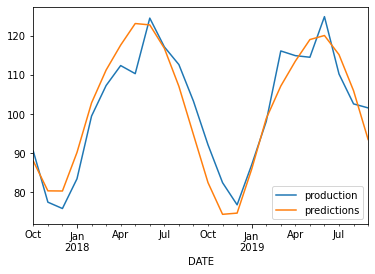

In [124]:
test.plot()

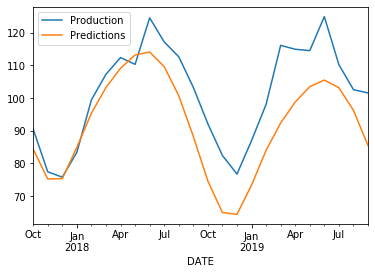

**TASK: Calculate your RMSE.**

In [128]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [126]:
mean_squared_error(test['production'],test_predictions)

33.39857319471323

In [127]:
np.sqrt(mean_squared_error(test['production'],test_predictions))

5.779149867819075

In [129]:
mean_absolute_error(test['production'],test_predictions)

4.844968560228778